In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
labels_2hop_all = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6',
               'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
               'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
               'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30',
               'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36']
labels_2hop_3 = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6']
labels_2hop_4 = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
               'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
               'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30',
               'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36']

labels_gr_all = ['4-1', '4-2', '4-3', '4-4', '4-5', '4-6',
                '5-1', '5-2', '5-3', '5-4', '5-5', '5-6', '5-7', '5-8', '5-9', '5-10', 
                '5-11', '5-12', '5-13', '5-14', '5-15', '5-16', '5-17', '5-18', '5-19', '5-20', '5-21']
labels_gr_4 = ['4-1', '4-2', '4-3', '4-4', '4-5', '4-6']
labels_gr_5 = ['5-1', '5-2', '5-3', '5-4', '5-5', '5-6', '5-7', '5-8', '5-9', '5-10', 
               '5-11', '5-12', '5-13', '5-14', '5-15', '5-16', '5-17', '5-18', '5-19', '5-20', '5-21']


In [4]:
def load_json_convert(filepath):
    with open(f'./{filepath}/output.json') as f:
        real = json.load(f)

    with open(f'./{filepath}/random_output.json') as f:
        random = json.load(f)
    
    real = pd.DataFrame(real)
    real['domain'] = real['dataset'].str.split('-').str[0]
    random = pd.DataFrame(random)
    random['domain'] = random['dataset'].str.split('-').str[0]
    
    return real, random

In [88]:
def sig_profile(real, random, label, datasets, domain = "all"):
        
    # Prepare for plotting
    plt.figure(figsize=(10, 8))

    srp_data = []
    
    if domain != "all":
        real = real[real['domain'] == domain]
        random = random[random['domain'] == domain]
            
    for data in datasets:
        real_data = real[real['dataset'] == data][label]
        random_data = random[random['dataset'] == data][label]

        # Compute Delta_i for each subgraph
        epsilon = 10
        delta_i = {}
        for key in list(real_data):
            N_real_i = real_data[key].values
            N_rand_i = random_data[key].values
            delta_i[key] = (N_real_i - N_rand_i) / (N_real_i + N_rand_i + epsilon)

        # Normalize Delta_i to get SRP_i
        sum_delta_squared = sum([delta**2 for delta in delta_i.values()])
        srp_i = [delta / np.sqrt(sum_delta_squared) for delta in delta_i.values()]

        srp_data.append(srp_i)

        # Plot the Subgraph Ratio Profile
        plt.plot(label, srp_i, marker='o', label=f'{data}')

    if domain == "all":
        df = pd.DataFrame(srp_data, index = datasets).T
        correlation_matrix = df.corr(method='pearson')
    else:
        correlation_matrix = None

    # Plot settings
    plt.xlabel('2Hoplets Index')
    plt.ylabel('Normalized Significance Profile Score')
    plt.title(f'{domain} datasets')
    plt.ylim(-0.5, 0.5)
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    plt.legend()
    plt.xticks(rotation=45)

    # num_labels_to_show = 8
    # step = len(labels) // (num_labels_to_show - 1)
    # visible_positions = list(range(0, len(labels), step))[:num_labels_to_show]
    # visible_labels = [labels[i] for i in visible_positions]
    # plt.xticks(visible_positions, visible_labels)


    # Save the plot
    # filename = f'{domain}_extend_3.png'
    # plt.savefig(f'./figure/{filename}')

    # Display the plot
    plt.show()
    return correlation_matrix

In [89]:
def conf_mat(labels, correlation_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='YlOrBr', cbar=True, square=True, vmin=-0.3, vmax=1)
    plt.title('Correlation Coefficient Matrix')
    plt.xlabel('Datasets')
    plt.ylabel('Datasets')
    # Add custom colored labels
    ax = plt.gca()
    ax.set_xticks(np.arange(len(labels)) + 0.5)
    ax.set_yticks(np.arange(len(labels)) + 0.5)
    ax.set_xticklabels(labels, rotation=90, ha='right', rotation_mode='anchor')
    ax.set_yticklabels(labels, rotation=0)
    #ax.set_xticklabels([''] * len(labels))
    #ax.set_yticklabels([''] * len(labels))
    plt.show()

### For Each Domain

In [34]:
datasets = [
            'ca-HepPh', 'ca-GrQc', 'ca-Erdos992', 'ca-netscience',
            'web-indochina-2004', 'web-sk-2005', # 'web-edu', 'web-webbase',
            'email-univ','email-Enron', 'email-EU',
            'socfb-Haverford76', 'socfb-Hamilton46', 'socfb-UCSC68', 'socfb-UC64',
            'roadNet-CA', 'roadNet-TX', 'roadNet-PA',
            'loc-brightkite',
            'tags-ask-ubuntu', 'tags-math-sx',
            ]
real, random = load_json_convert("extend_output")

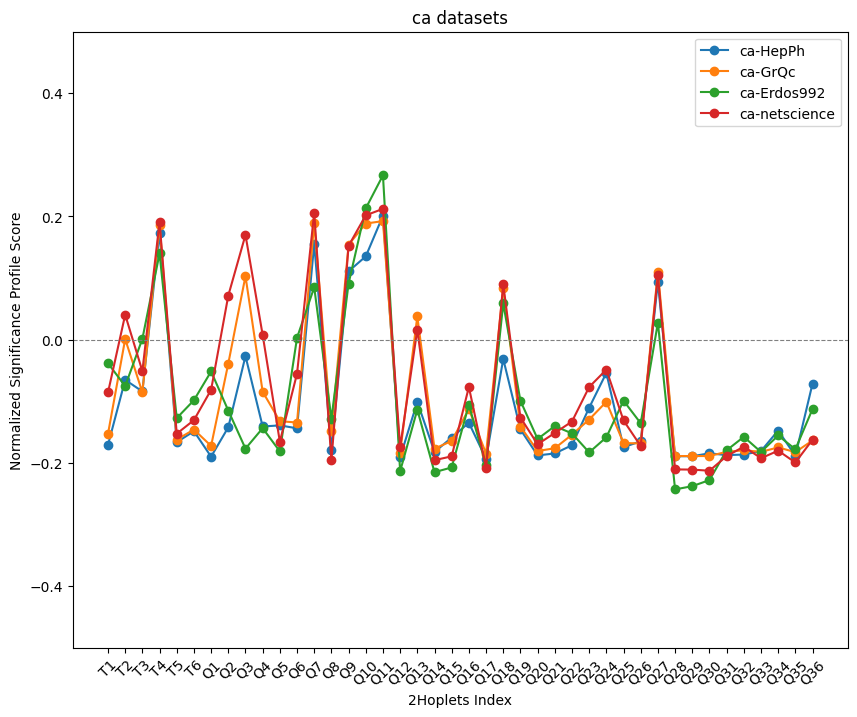

In [35]:
domain = real[real['dataset'] == 'datasets']['domain']
corr = sig_profile(real, random, labels_2hop_all, datasets, domain='ca')

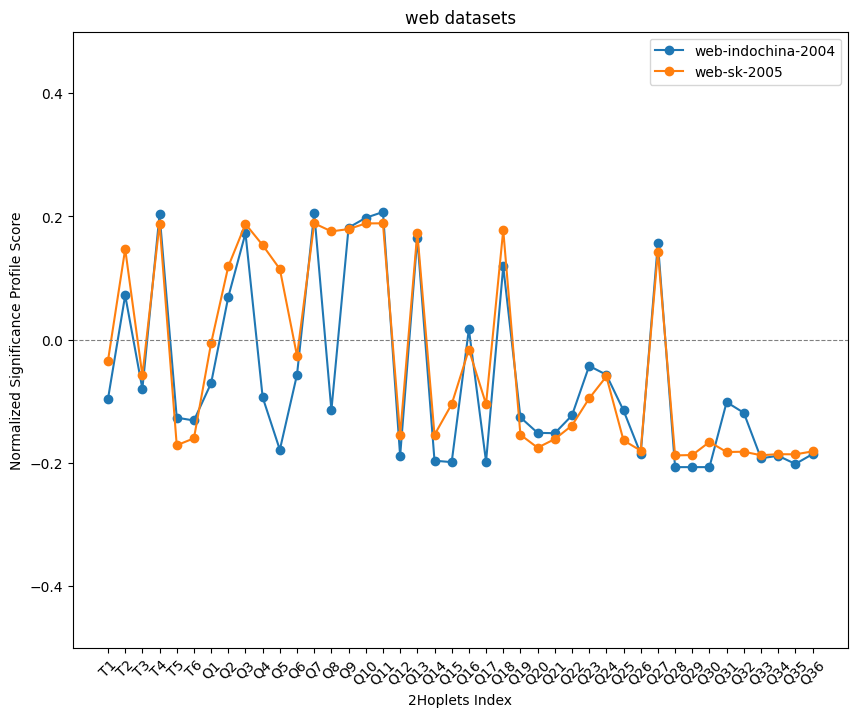

In [36]:
corr = sig_profile(real, random, labels_2hop_all, datasets, domain='web')

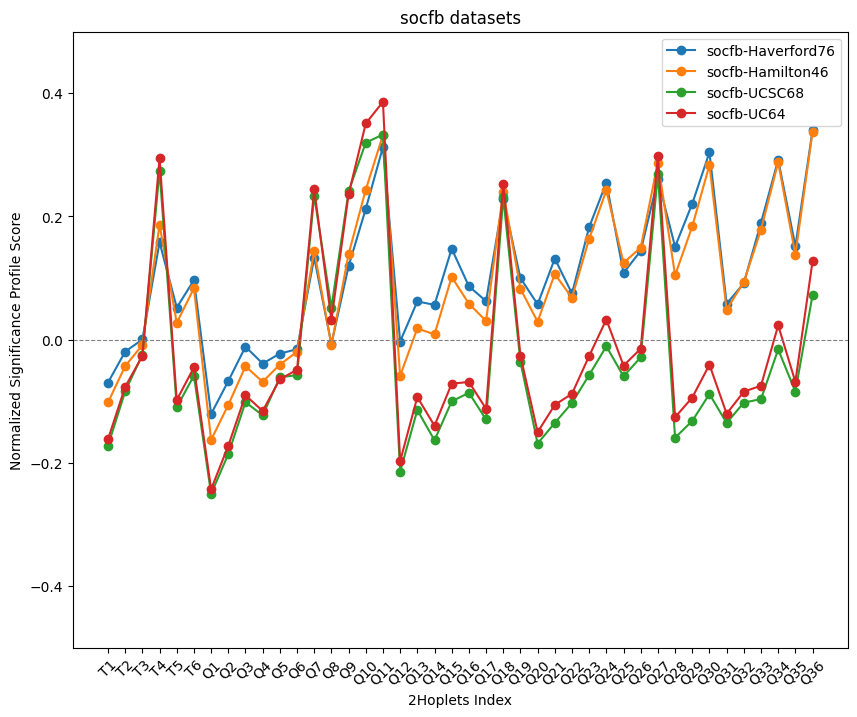

In [37]:
corr = sig_profile(real, random, labels_2hop_all, datasets, domain='socfb')

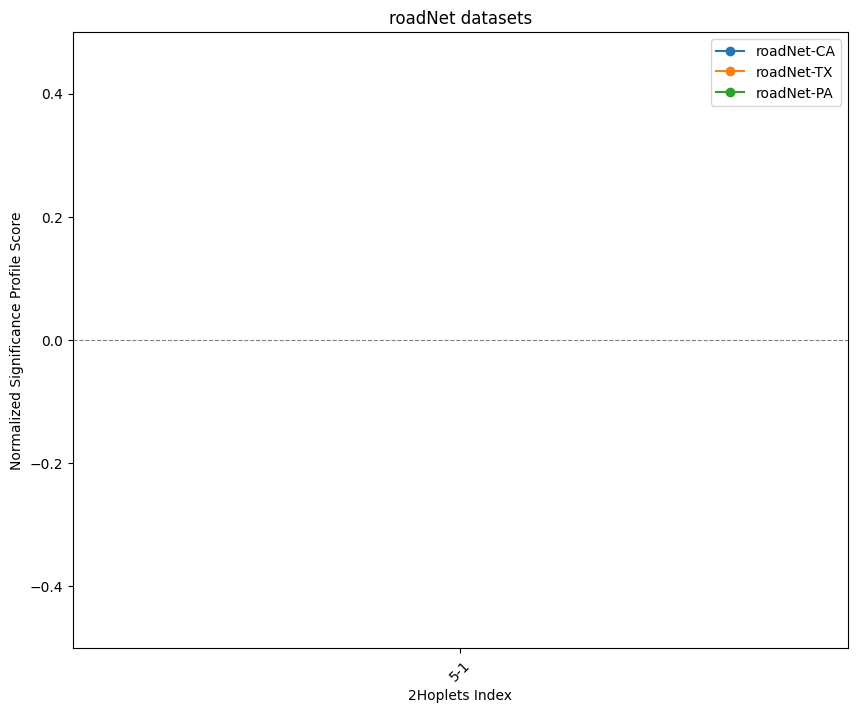

In [84]:
corr = sig_profile(real, random, labels_gr_5, datasets, domain='roadNet')

### Total

In [91]:
random

,dataset,4-1,4-2,4-3,4-4,4-5,4-6,5-1,5-10,5-11,...,5-21,5-2,5-3,5-4,5-5,5-6,5-7,5-8,5-9,domain
0,ca-dblp-2012,0.0,70.9,2.608374e+05,2.299140e+04,4.305126e+08,4.505395e+08,1.149409e+10,8.354400e+03,1.548630e+04,...,0.0,2.668850e+10,9.311584e+09,1.392514e+07,5.370572e+06,1.544742e+07,5.428112e+06,3.794222e+05,1.405900e+03,ca
1,ca-HepPh,284567.8,6978950.5,1.344735e+08,1.376109e+07,8.571657e+08,1.165383e+09,5.088878e+10,2.047076e+09,2.757111e+09,...,130010.8,2.086989e+11,8.831679e+10,1.433437e+10,8.809132e+09,2.196585e+10,8.610756e+09,6.785706e+08,2.630051e+08,ca
2,ca-GrQc,4.6,683.2,6.989130e+04,8.736300e+03,2.291651e+06,3.507654e+06,2.358480e+07,3.937940e+04,5.443400e+04,...,0.0,1.062474e+08,5.368202e+07,1.408020e+06,1.037649e+06,2.073461e+06,1.025310e+06,1.029955e+05,6.714200e+03,ca
3,ca-netscience,1.0,24.7,1.366700e+03,2.056000e+02,2.109860e+04,3.567730e+04,8.235630e+04,3.866000e+02,7.202000e+02,...,0.0,3.508817e+05,1.997092e+05,1.009660e+04,7.131400e+03,1.222750e+04,7.428800e+03,8.556000e+02,9.500000e+01,ca
4,email-enron-only,9.8,398.9,6.077900e+03,1.183700e+03,2.047210e+04,4.558790e+04,6.442650e+04,6.249700e+03,8.843900e+03,...,0.0,4.238516e+05,3.157025e+05,3.631040e+04,3.873110e+04,5.204560e+04,4.089320e+04,5.934500e+03,1.636300e+03,email
5,email-univ,12.3,1132.3,5.710210e+04,9.508000e+03,6.872255e+05,1.408052e+06,4.818610e+06,4.657680e+04,6.016740e+04,...,0.0,3.088308e+07,2.093257e+07,7.843142e+05,8.235013e+05,1.216597e+06,8.077445e+05,1.089855e+05,1.032330e+04,email
6,email-Enron,337696.2,7311275.2,2.011342e+08,8.400399e+06,3.143235e+09,1.805880e+09,5.579875e+11,2.830767e+09,7.126754e+09,...,482327.3,6.317392e+11,1.149771e+11,5.868360e+10,9.718282e+09,5.226013e+10,8.574545e+09,3.263783e+08,3.388927e+08,email
7,email-EU,158142.5,2116982.5,3.794606e+07,2.079295e+06,2.845899e+08,2.489498e+08,1.804072e+10,5.022188e+08,7.828466e+08,...,176689.6,4.167134e+10,1.038121e+10,3.959577e+09,1.182400e+09,5.416008e+09,1.097097e+09,4.664427e+07,3.831759e+07,email
8,contact-high-schol,1528.4,54589.2,7.229394e+05,1.618690e+05,1.751393e+06,4.738130e+06,1.258731e+07,2.697331e+06,2.973028e+06,...,46.6,1.236521e+08,1.114574e+08,1.011753e+07,1.656540e+07,1.834124e+07,1.644660e+07,2.963161e+06,6.731327e+05,contact
9,contact-primary-school,71418.7,875733.2,4.127989e+06,8.842570e+05,3.706186e+06,9.587174e+06,2.637779e+07,3.810665e+07,4.285480e+07,...,39852.8,2.421611e+08,2.068560e+08,5.429220e+07,8.243989e+07,9.688757e+07,8.226779e+07,1.400919e+07,9.093842e+06,contact


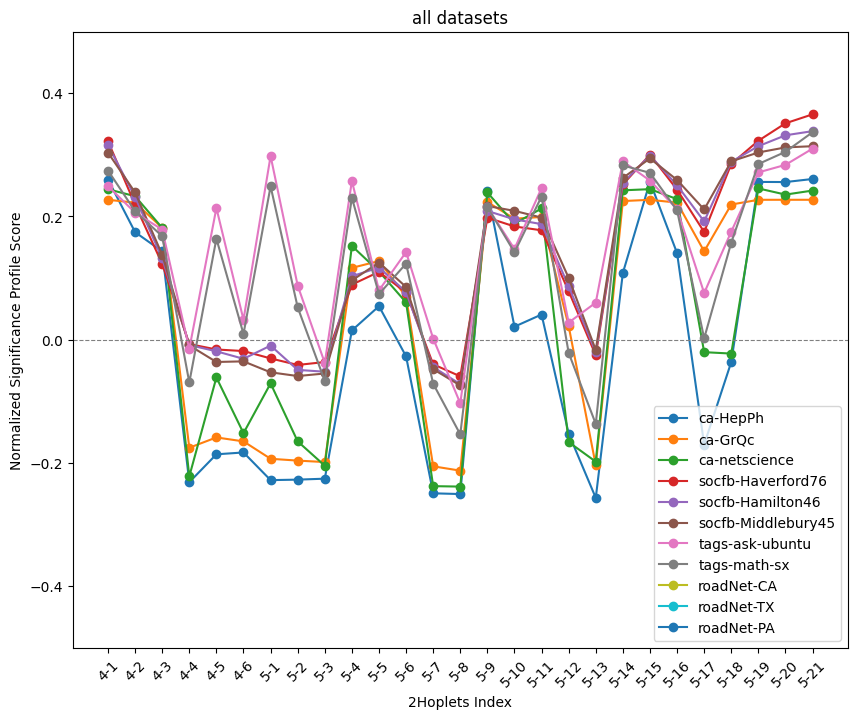

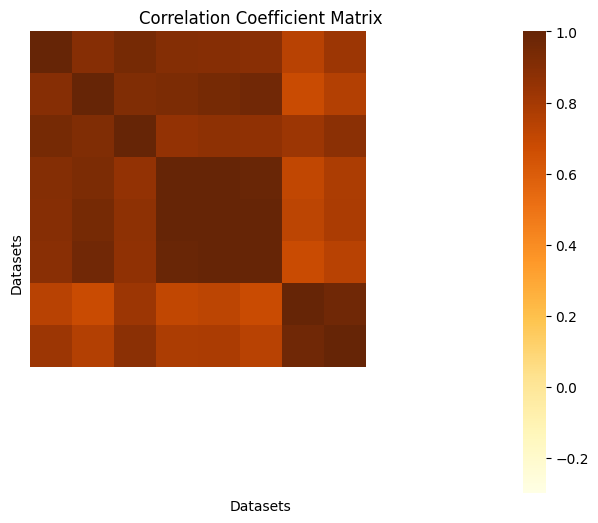

In [90]:
datasets = [
            'ca-HepPh', 'ca-GrQc', 'ca-netscience', #'ca-dblp-2012',
            #'web-indochina-2004', 'web-edu', 'web-webbase', 'web-sk-2005',
            #'email-univ','email-Enron', #'email-EU',
            
            'socfb-Haverford76', 'socfb-Hamilton46', 'socfb-Middlebury45', #'socfb-UC64', 'socfb-UCSC68',
            'tags-ask-ubuntu', 'tags-math-sx',
            'roadNet-CA', 'roadNet-TX', 'roadNet-PA',
            ]
real, random = load_json_convert("original_output")
domain = real[real['dataset'] == 'datasets']['domain']
corr_mat = sig_profile(real, random, labels_gr_all, datasets)
conf_mat(domain, corr_mat)

In [86]:
corr_mat

,ca-HepPh,ca-GrQc,ca-netscience,socfb-Haverford76,socfb-Hamilton46,socfb-Middlebury45,tags-ask-ubuntu,tags-math-sx,roadNet-CA,roadNet-TX,roadNet-PA
ca-HepPh,1.000000,0.896293,0.944283,0.899287,0.896398,0.886308,0.738034,0.824771,NaN,NaN,NaN
ca-GrQc,0.896293,1.000000,0.909970,0.925976,0.944746,0.960543,0.680629,0.752171,NaN,NaN,NaN
ca-netscience,0.944283,0.909970,1.000000,0.846622,0.860093,0.854737,0.823279,0.884026,NaN,NaN,NaN
socfb-Haverford76,0.899287,0.925976,0.846622,1.000000,0.996539,0.988833,0.708853,0.774261,NaN,NaN,NaN
socfb-Hamilton46,0.896398,0.944746,0.860093,0.996539,1.000000,0.995418,0.723363,0.780901,NaN,NaN,NaN
socfb-Middlebury45,0.886308,0.960543,0.854737,0.988833,0.995418,1.000000,0.680335,0.740263,NaN,NaN,NaN
tags-ask-ubuntu,0.738034,0.680629,0.823279,0.708853,0.723363,0.680335,1.000000,0.966136,NaN,NaN,NaN
tags-math-sx,0.824771,0.752171,0.884026,0.774261,0.780901,0.740263,0.966136,1.000000,NaN,NaN,NaN
roadNet-CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
roadNet-TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
def calculate_average_correlations(correlation_matrix, domain_indices):
    domain_intra_corr = {}
    domain_inter_corr = {}
    intra_domain_corr = []
    inter_domain_corr = []

    for domain1, indices1 in domain_indices.items():
        for domain2, indices2 in domain_indices.items():
            corrs = correlation_matrix.loc[indices1, indices2].values.flatten()
            if domain1 == domain2:
                corrs = [corr for corr in corrs if corr != 1.0]
                mean_corr = np.mean(corrs)
                domain_intra_corr[(domain1, domain2)] = mean_corr
                intra_domain_corr.extend(corrs)
            else:
                mean_corr = np.mean(corrs)
                domain_inter_corr[(domain1, domain2)] = mean_corr
                inter_domain_corr.extend(corrs)

    average_intra_domain_corr = np.mean(intra_domain_corr) 
    average_inter_domain_corr = np.mean(inter_domain_corr)

    return domain_intra_corr, domain_inter_corr, average_intra_domain_corr, average_inter_domain_corr

# 도메인 별 유사도 계산
domains_indices = {
    'ca': ['ca-HepPh', 'ca-GrQc', 'ca-netscience'],
    'socfb' : ['socfb-Haverford76', 'socfb-Hamilton46', 'socfb-Middlebury45'],
    'tags': ['tags-ask-ubuntu', 'tags-math-sx'],
    'roadNet' : ['roadNet-CA', 'roadNet-TX', 'roadNet-PA']
}

domain_intra_corr, domain_inter_corr, average_intra_domain_corr, average_inter_domain_corr = calculate_average_correlations(corr_mat, domains_indices)

# 도메인 별 유사도 출력
print("Domain intra-correlations:")
for domains, corr in domain_intra_corr.items():
    print(f'{domains}: {corr:.4f}')

print("\nDomain inter-correlations:")
for domains, corr in domain_inter_corr.items():
    print(f'{domains}: {corr:.4f}')

# 평균 intra-domain 및 inter-domain 유사도 출력
print(f'\nAverage intra-domain correlation: {average_intra_domain_corr:.4f}')
print(f'Average inter-domain correlation: {average_inter_domain_corr:.4f}')


Domain intra-correlations:
('ca', 'ca'): 0.9168
('socfb', 'socfb'): 0.9936
('tags', 'tags'): 0.9661
('roadNet', 'roadNet'): nan

Domain inter-correlations:
('ca', 'socfb'): 0.8972
('ca', 'tags'): 0.7838
('ca', 'roadNet'): nan
('socfb', 'ca'): 0.8972
('socfb', 'tags'): 0.7347
('socfb', 'roadNet'): nan
('tags', 'ca'): 0.7838
('tags', 'socfb'): 0.7347
('tags', 'roadNet'): nan
('roadNet', 'ca'): nan
('roadNet', 'socfb'): nan
('roadNet', 'tags'): nan

Average intra-domain correlation: nan
Average inter-domain correlation: nan


In [71]:
def calculate_average_correlations(correlation_matrix, domain_indices):
    domain_intra_corr = {}
    domain_inter_corr = {}
    intra_domain_corr = []
    inter_domain_corr = []

    for domain1, indices1 in domain_indices.items():
        for domain2, indices2 in domain_indices.items():
            corrs = correlation_matrix.loc[indices1, indices2].values.flatten()
            if domain1 == domain2:
                corrs = [corr for corr in corrs if corr != 1.0]
                mean_corr = np.mean(corrs)
                domain_intra_corr[(domain1, domain2)] = mean_corr
                intra_domain_corr.extend(corrs)
            else:
                mean_corr = np.mean(corrs)
                domain_inter_corr[(domain1, domain2)] = mean_corr
                inter_domain_corr.extend(corrs)

    print(intra_domain_corr)
    print(inter_domain_corr)
    average_intra_domain_corr = np.mean(intra_domain_corr) 
    average_inter_domain_corr = np.mean(inter_domain_corr)

    return domain_intra_corr, domain_inter_corr, average_intra_domain_corr, average_inter_domain_corr

# 도메인 별 유사도 계산
domains_indices = {
    'ca': ['ca-HepPh', 'ca-GrQc', 'ca-netscience'],
    'socfb' : ['socfb-Haverford76', 'socfb-Hamilton46', 'socfb-Middlebury45'],
    'tags': ['tags-ask-ubuntu', 'tags-math-sx'],
    'roadNet' : ['roadNet-CA', 'roadNet-TX', 'roadNet-PA']
}

domain_intra_corr, domain_inter_corr, average_intra_domain_corr, average_inter_domain_corr = calculate_average_correlations(corr_mat, domains_indices)

# 도메인 별 유사도 출력
print("Domain intra-correlations:")
for domains, corr in domain_intra_corr.items():
    print(f'{domains}: {corr:.4f}')

print("\nDomain inter-correlations:")
for domains, corr in domain_inter_corr.items():
    print(f'{domains}: {corr:.4f}')

# 평균 intra-domain 및 inter-domain 유사도 출력
print(f'\nAverage intra-domain correlation: {average_intra_domain_corr:.4f}')
print(f'Average inter-domain correlation: {average_inter_domain_corr:.4f}')


[0.9444345169824564, 0.8932658033925489, 0.9444345169824564, 0.9644378339695449, 0.8932658033925489, 0.9644378339695449, 0.9871822689605104, 0.9525836925451449, 0.9871822689605104, 0.9812898707457011, 0.9525836925451449, 0.9812898707457011, 0.9284452966229931, 0.9284452966229931, 0.9999737031472505, 0.9998301640595316, 0.9999737031472505, 0.9999216006190856, 0.9998301640595316, 0.9999216006190856]
[0.36017970553603856, 0.44742032205220983, 0.5875357314154577, 0.17636835513222493, 0.2613849251264185, 0.4102412768355531, 0.047016238679671495, 0.13250439079663176, 0.2776136381189515, 0.5736721802302074, 0.7266366098499015, 0.651469293071284, 0.743927189176255, 0.7324266530009044, 0.8028767241767243, 0.4006126117230403, 0.39791829582174276, 0.39336719015115723, 0.4847244586749969, 0.4826627821225424, 0.4792088253676323, 0.4329672586051929, 0.43119872934049697, 0.42832324105842934, 0.36017970553603856, 0.17636835513222493, 0.047016238679671495, 0.44742032205220983, 0.2613849251264185, 0.132

4 :  0.98 0.87

5 :  0.95 0.84

4+5 : 0.96 0.84